Same val loss ~0.06, trying out different optimizers

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 30
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3]
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

Best model from Activations notebook - activation: softmax, optimizer: RMSprop

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='softmax',))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 88s 212ms/step - loss: 0.8383 - val_loss: 0.9272
Epoch 2/200
400/400 [==============================] - 62s 154ms/step - loss: 0.4953 - val_loss: 0.3019
Epoch 3/200
400/400 [==============================] - 63s 158ms/step - loss: 0.2272 - val_loss: 0.1691
Epoch 4/200
400/400 [==============================] - 62s 155ms/step - loss: 0.1307 - val_loss: 0.0916
Epoch 5/200
400/400 [==============================] - 61s 154ms/step - loss: 0.0960 - val_loss: 0.0750
Epoch 6/200
400/400 [==============================] - 61s 154ms/step - loss: 0.0841 - val_loss: 0.0683
Epoch 7/200
400/400 [==============================] - 60s 151ms/step - loss: 0.0796 - val_loss: 0.0668
Epoch 8/200
400/400 [==============================] - 62s 155ms/step - loss: 0.0775 - val_loss: 0.0637
Epoch 9/200
400/400 [==============================] - 61s 154ms/step - loss: 0.0761 - val_loss: 0.0600
Epoch 10/200
400/400 [==============================] - 61s 151m

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

511/511 [==============================] - 14s 27ms/step - loss: 0.0624


0.023300287315813906

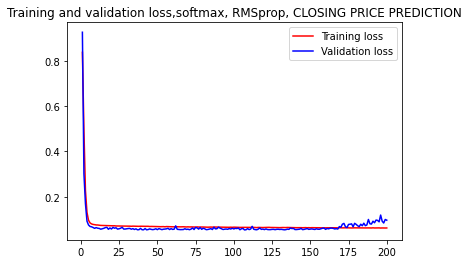

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Same, softmax, Adam()

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(5,
  activation='softmax',))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 64s 152ms/step - loss: 0.7554 - val_loss: 0.5824
Epoch 2/200
400/400 [==============================] - 61s 152ms/step - loss: 0.2832 - val_loss: 0.2110
Epoch 3/200
400/400 [==============================] - 62s 154ms/step - loss: 0.1636 - val_loss: 0.1349
Epoch 4/200
400/400 [==============================] - 61s 152ms/step - loss: 0.1120 - val_loss: 0.0907
Epoch 5/200
400/400 [==============================] - 62s 156ms/step - loss: 0.0906 - val_loss: 0.0852
Epoch 6/200
400/400 [==============================] - 61s 152ms/step - loss: 0.0810 - val_loss: 0.1043
Epoch 7/200
400/400 [==============================] - 61s 152ms/step - loss: 0.0768 - val_loss: 0.1021
Epoch 8/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0748 - val_loss: 0.0827
Epoch 9/200
400/400 [==============================] - 61s 152ms/step - loss: 0.0733 - val_loss: 0.0807
Epoch 10/200
400/400 [==============================] - 60s 151m

In [ ]:
eval1 = model1.evaluate(test_gen, steps = test_steps)
eval1 *std[3]

511/511 [==============================] - 15s 30ms/step - loss: 0.0749


0.02794805149105506

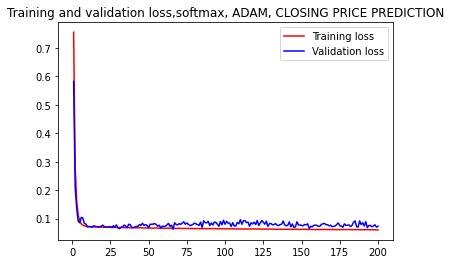

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, ADAM, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best, softmax, Adamax,  
SGD not working
Ada nope
Adamax trying but..

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(5,
  activation='softmax',))
model2.add(layers.Dense(1,
  ))
model2.compile(optimizer= tf.keras.optimizers.Adamax(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 82s 175ms/step - loss: 0.8514 - val_loss: 1.1107
Epoch 2/200
400/400 [==============================] - 64s 159ms/step - loss: 0.6898 - val_loss: 0.7393
Epoch 3/200
400/400 [==============================] - 62s 156ms/step - loss: 0.3894 - val_loss: 0.2726
Epoch 4/200
400/400 [==============================] - 63s 158ms/step - loss: 0.2411 - val_loss: 0.1802
Epoch 5/200
400/400 [==============================] - 63s 157ms/step - loss: 0.1975 - val_loss: 0.1561
Epoch 6/200
400/400 [==============================] - 62s 156ms/step - loss: 0.1610 - val_loss: 0.1470
Epoch 7/200
400/400 [==============================] - 62s 156ms/step - loss: 0.1241 - val_loss: 0.1551
Epoch 8/200
400/400 [==============================] - 62s 155ms/step - loss: 0.1041 - val_loss: 0.1772
Epoch 9/200
400/400 [==============================] - 62s 155ms/step - loss: 0.0930 - val_loss: 0.1757
Epoch 10/200
400/400 [==============================] - 62s 155m

In [ ]:
eval2 = model2.evaluate(test_gen, steps = test_steps)
eval2 *std[3]

511/511 [==============================] - 15s 29ms/step - loss: 0.4670


0.17438472076087752

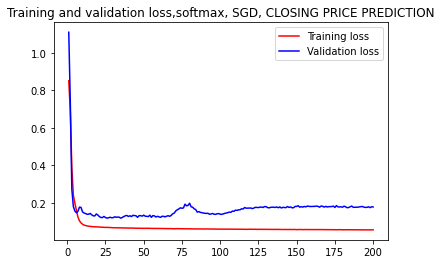

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, SGD, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(5,
  activation='softmax',))
model3.add(layers.Dense(1,
  ))
model3.compile(optimizer= tf.keras.optimizers.Nadam(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=400,
  epochs=100,
  validation_data=val_gen,
  validation_steps=val_steps)

NameError: ignored